<a href="https://colab.research.google.com/github/TheJojoJoseph/32-bit-wallace_tree_multiplier-/blob/master/Major_Question_Paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Major Question Paper for PGD

### The exam is of 3 Hrs and 40 Marks. Needs to finish all these tasks by 3 Hrs and submit the Notebook file through Moodle platform

#### Do not use AI assistance for the exam. You may utilize internet (including stack overflow), notes, past codes that you wrote. Any form of collaboration is not allowed.

#### Screen sharing is not required as it may revale your code to other students.

-----

### You are provided with one csv file. This file is the following-followers graph of our Connect.sonaa.in. The file has 4 columns

- src_node : The node following
- dst_node : The node is being followd
- src_space_id: Space membership of src node
- dst_space_id: Space membership of dst node

**Note that their may be resiprocal edges. If there is a resiprocal edges, it indicates frinedship relation. For example: node 1 -> 11 as well as 11 -> 1 indicates that node 1 and 11 are friend. On the other hand if an edge is found 4 -> 11 but the reverse data is not available indicate that node 4 follows 11 but the node 11 do not follow back to 4.**

Space 3 is your course CSL7390 and Space 4 is the other course I teach CSL7870. The other spaces are for my research teams. Based on this data perform the following activity.

## Question A:

1. Load the data as directed graph. [2 marks]
2. Draw the graph. [3 marks]
3. Draw the degree distribution for in-degree and out-degree separately. [5 marks]

In [11]:
# Loading
# Ans: QA1. Load the data as directed graph. [2 marks]

from google.colab import files
uploaded = files.upload()


import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

data = pd.read_csv('all_26092024.csv')
print(data.head())

Saving all_26092024.csv to all_26092024 (5).csv
   src_node  dst_node  src_space_id  dst_space_id
0        11         1             1             1
1        11         1             2             1
2        23         1             3             1
3        23         1             1             1
4       101         1             1             1


In [12]:
G = nx.DiGraph()

# Add edges( Columns name for ref data. src_node  dst_node  src_space_id  dst_space_id )
for _, row in data.iterrows():
    G.add_edge(row['src_node'], row['dst_node'])
print(f"Edges_Count: {G.number_of_edges()}")
print(f"Nodes_Count: {G.number_of_nodes()}")

Edges_Count: 681
Nodes_Count: 131


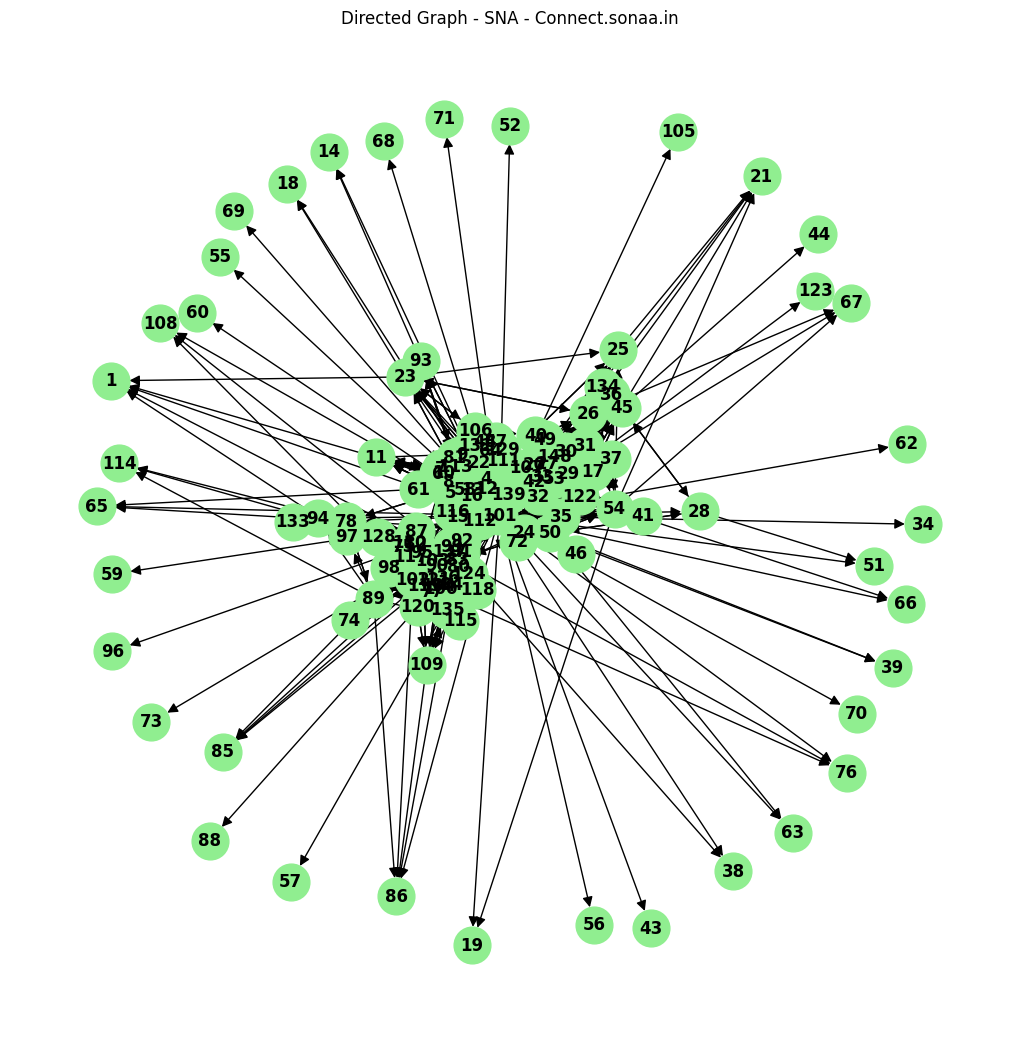

In [14]:
# Drawing
# Ans: QA2. Draw the graph. [3 marks]
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightgreen', font_size=12, font_weight='bold', arrowsize=15)
plt.title("Directed Graph - SNA - Connect.sonaa.in")
plt.show()

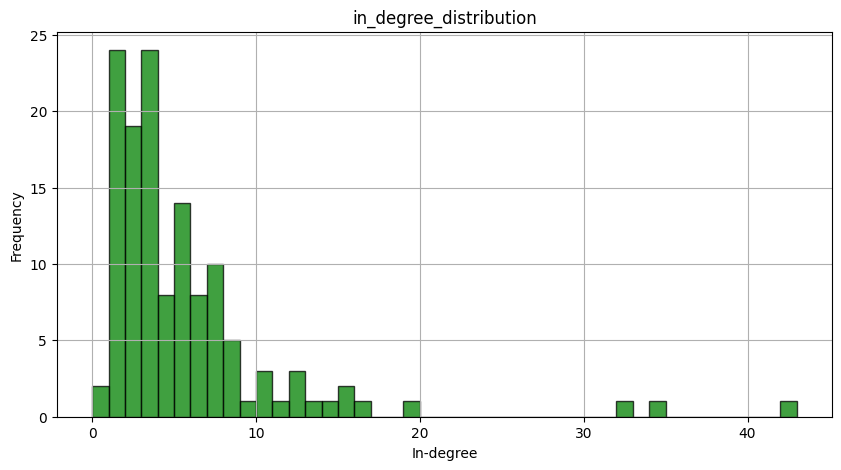

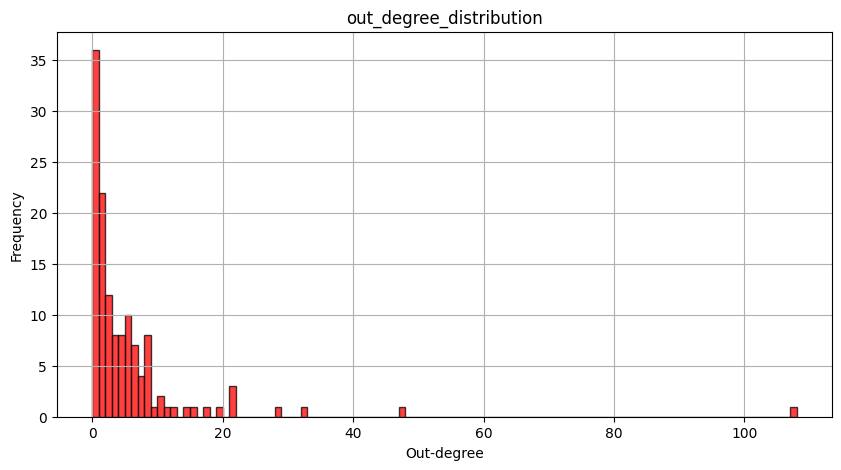

In [15]:
# Degree distribution
# Ans: QA3. Draw the degree distribution for in-degree and out-degree separately. [5 marks]
in_degrees = [d for _, d in G.in_degree()]
out_degrees = [d for _, d in G.out_degree()]

def plot_degree_distribution(degrees, title, xlabel, color):
    plt.figure(figsize=(10, 5))
    plt.hist(degrees, bins=range(min(degrees), max(degrees) + 1), alpha=0.75, color=color, edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

plot_degree_distribution(in_degrees, "in_degree_distribution", "In-degree", "green")
plot_degree_distribution(out_degrees, "out_degree_distribution", "Out-degree", "red")

## Question B:

1. How many strongly connected components are there? [1 marks]
2. Remove all nodes and edges that are not part of any strongly connected components. [4 marks]
3. Draw the graph after node+edge removal. [3 marks]
4. Is this graph connected? If not, how many components are there? [2 marks]

In [20]:
# SCC
# Ans: QB1 How many strongly connected components are there? [1 marks]
# Approch - using networkx inbuild method.
print(f"Count of strongly connected components: {len(list(nx.strongly_connected_components(G)))}")

Count of strongly connected components: 39


In [21]:
# Removal
# Ans: QB2 Remove all nodes and edges that are not part of any strongly connected components. [4 marks]
# Approch - Create a new graph which only nodes of SCC.  (if len(component) > 1)
scc_subgraph_nodes_connected = {node for component in scc for node in component if len(component) > 1}
G_scc_new = G.subgraph(scc_subgraph_nodes_connected).copy()
print(f"Edges_Count: {G_scc_new.number_of_edges()}")
print(f"Nodes_Count: {G_scc_new.number_of_nodes()}")

Edges_Count: 610
Nodes_Count: 93


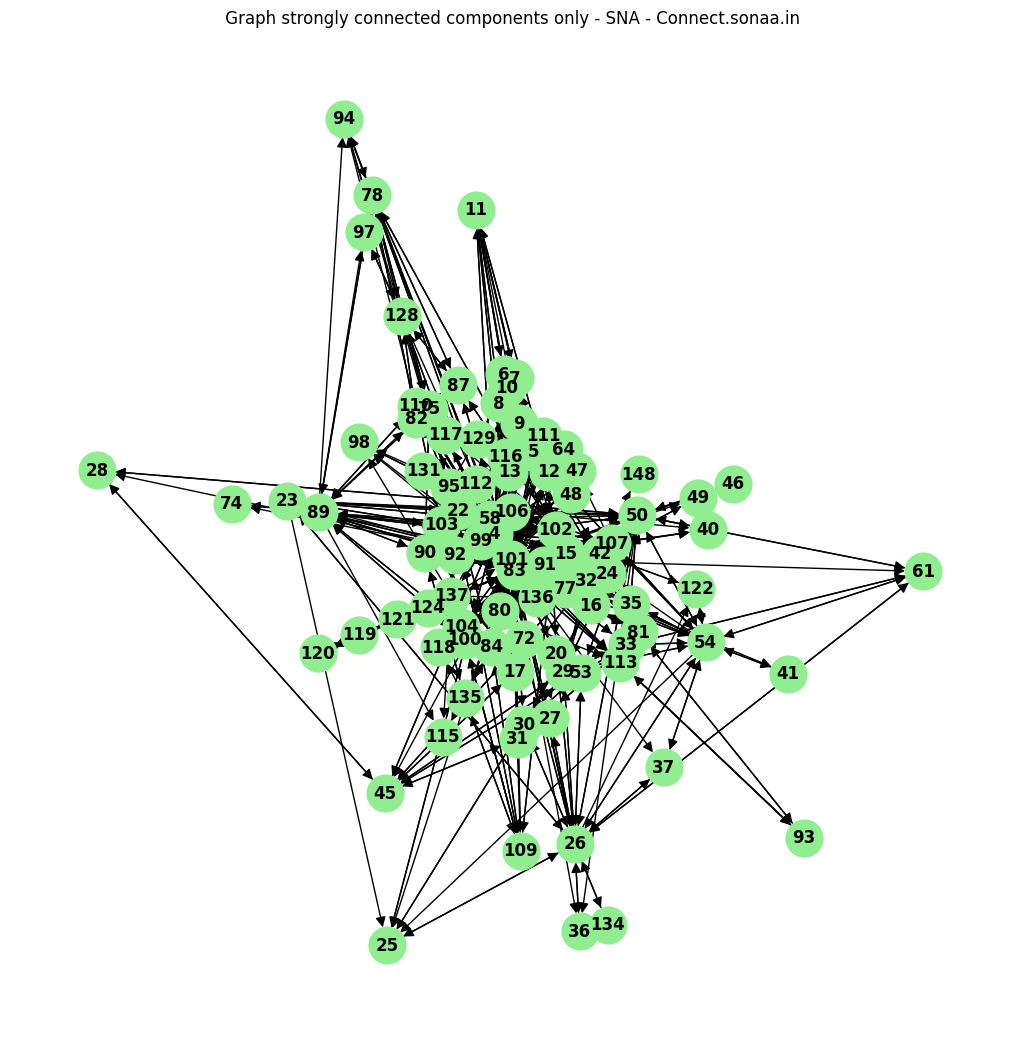

In [23]:
# Ans: QB3 Draw the graph after node+edge removal. [3 marks]
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)
nx.draw(G_scc_new, pos, with_labels=True, node_size=700, node_color='lightgreen', font_size=12, font_weight='bold', arrowsize=15)
plt.title(" Graph strongly connected components only - SNA - Connect.sonaa.in")
plt.show()

In [18]:
# Connectedness
# Ans: QB4 Is this graph connected? If not, how many components are there? [2 marks]
# Approch - Check if strongly connected (ibuild method :is_strongly_connected ) else components count (inbuild method :is_strongly_connected )
is_strongly_connected = nx.is_strongly_connected(G_scc_new)
print(f"Is the graph strongly connected? {is_strongly_connected}")

# If it's not strongly connected, count the number of weakly connected components
if not is_strongly_connected:
    num_components = nx.number_strongly_connected_components(G_scc_new)
    print(f"Number of strongly connected components in the reduced graph: {num_components}")

Is the graph strongly connected? True


## Question C:

1. Load the graph with only friendship relationship as undirected graph. **Note that friendship relations are those which has resiprocal links. You should not load any edge that is not having any resiprocal edges in the given data set.** [2 marks]
2. Draw the new graph. [2 marks]
3. Draw the degree distribution. [1 marks]

In [18]:
# Loading

# Initialize an undirected graph for friendships
friendship_graph = nx.Graph()

# Iterate through the data to find reciprocal edges
for _, row in data.iterrows():
    src = row['src_node']
    dst = row['dst_node']

    # Check if the reciprocal edge exists
    if (dst, src) in G.edges():
        # Add both edges as an undirected edge in the friendship graph
        friendship_graph.add_edge(src, dst)

# Print basic information about the friendship graph
print(f"Number of nodes: {friendship_graph.number_of_nodes()}")
print(f"Number of edges: {friendship_graph.number_of_edges()}")

Number of nodes: 93
Number of edges: 266


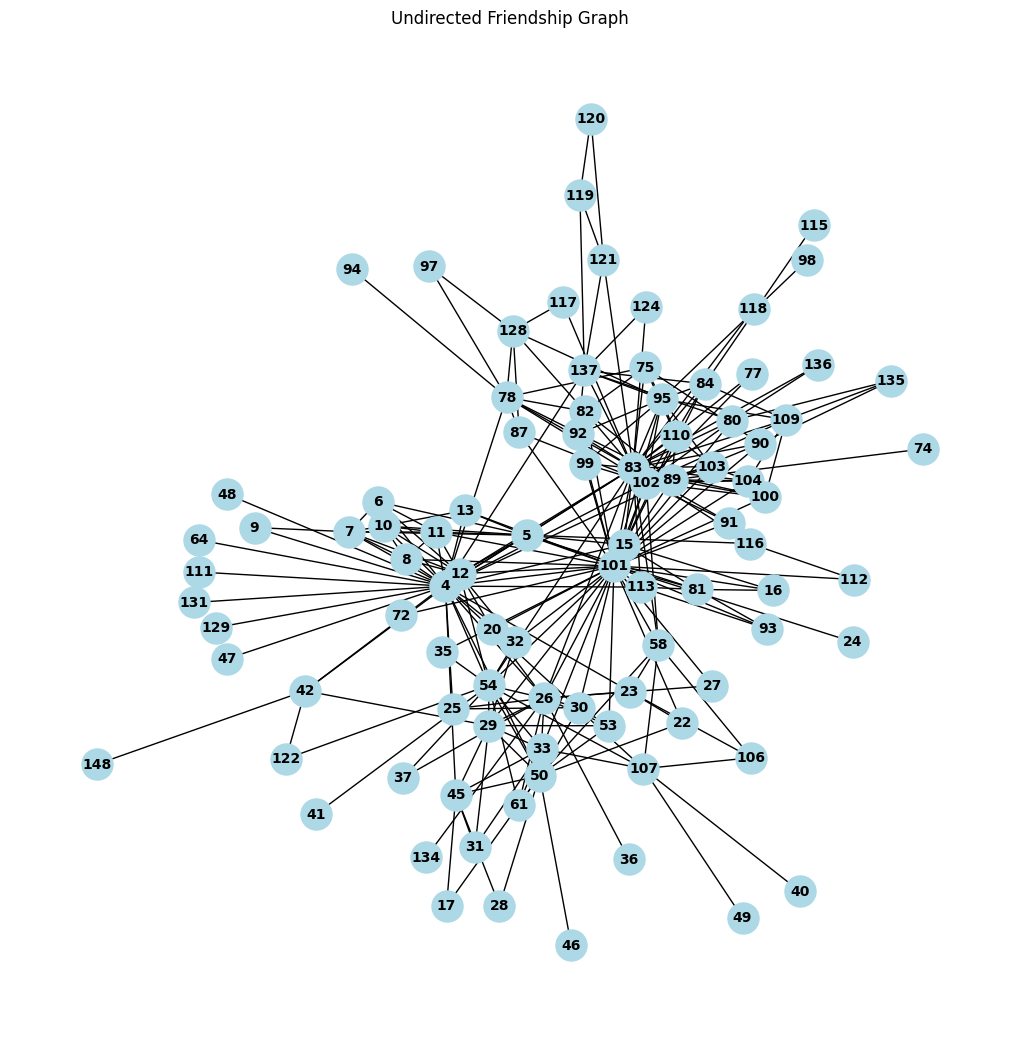

In [19]:
# Drawing

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(friendship_graph)  # Layout for better visualization

# Draw the nodes and edges of the undirected graph
nx.draw(friendship_graph, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_weight='bold')

# Show the graph
plt.title("Undirected Friendship Graph")
plt.show()

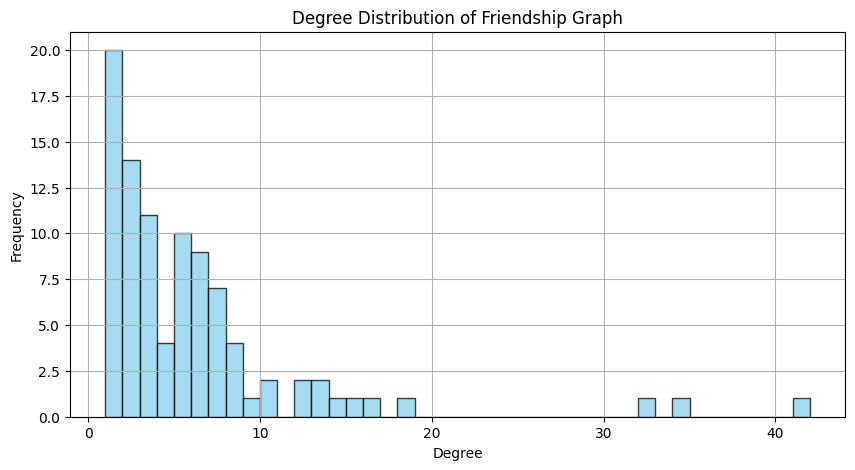

In [20]:
# Degree distribution
# Get degree distribution of the undirected graph
degrees = [d for _, d in friendship_graph.degree()]

# Plot the degree distribution
plt.figure(figsize=(10, 5))
plt.hist(degrees, bins=range(min(degrees), max(degrees) + 1), alpha=0.75, color='skyblue', edgecolor='black')
plt.title("Degree Distribution of Friendship Graph")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

## Question D:

1. With the friends graph generated in the previous step, find all the pair of nodes which has distance 2 hop but no direct connections. [2 marks]
2. For all these pair of nodes calculate Jacard Coefficient, Preferential attachment score, Adamic-Adar Index, and resource allocation index. [2 marks]
3. Rank the pairs based on the index scores calculated. [2 marks]
4. 5 separate ranks will be there. Top (highest score) are the predicted links. Analyze the differences in the top 10 predicted links by different methods. Discuss your findings. [4 marks]

In [22]:
# pair finding
# Find all pairs of nodes with a 2-hop distance but no direct edge between them
two_hop_pairs = set()

# Iterate over all nodes
for node in friendship_graph.nodes():
    # Get neighbors of neighbors (2-hop connections)
    neighbors = set(friendship_graph.neighbors(node))
    for neighbor in neighbors:
        second_hop_neighbors = set(friendship_graph.neighbors(neighbor)) - neighbors - {node}
        for second_hop in second_hop_neighbors:
            # Add the two-hop pair to the set if they are not directly connected
            if not friendship_graph.has_edge(node, second_hop):
                two_hop_pairs.add(tuple(sorted([node, second_hop])))

# Convert the set to a list of pairs
two_hop_pairs = list(two_hop_pairs)
print(f"Number of 2-hop but no direct connection pairs: {len(two_hop_pairs)}")

Number of 2-hop but no direct connection pairs: 1692


In [23]:
# index calculation (you may add new cell if require)
# Calculate various link prediction metrics for the identified pairs

# Jaccard Coefficient
jaccard_coefficients = list(nx.jaccard_coefficient(friendship_graph, two_hop_pairs))

# Preferential Attachment Score
preferential_attachment_scores = list(nx.preferential_attachment(friendship_graph, two_hop_pairs))

# Adamic-Adar Index
adamic_adar_indices = list(nx.adamic_adar_index(friendship_graph, two_hop_pairs))

# Resource Allocation Index
resource_allocation_indices = list(nx.resource_allocation_index(friendship_graph, two_hop_pairs))

# Convert these metrics into dictionaries for easier access
jaccard_dict = {(u, v): score for u, v, score in jaccard_coefficients}
preferential_attachment_dict = {(u, v): score for u, v, score in preferential_attachment_scores}
adamic_adar_dict = {(u, v): score for u, v, score in adamic_adar_indices}
resource_allocation_dict = {(u, v): score for u, v, score in resource_allocation_indices}

jaccard_dict
preferential_attachment_dict
adamic_adar_dict
resource_allocation_dict

{(4, 119): 0.1111111111111111,
 (16, 93): 0.19047619047619047,
 (17, 58): 0.07142857142857142,
 (8, 9): 0.15625,
 (107, 131): 0.03125,
 (6, 48): 0.03125,
 (58, 95): 0.10877684407096172,
 (7, 129): 0.03125,
 (80, 113): 0.05322128851540616,
 (30, 112): 0.023809523809523808,
 (10, 54): 0.10817307692307693,
 (102, 137): 0.4471086511527688,
 (22, 28): 0.07142857142857142,
 (20, 104): 0.023809523809523808,
 (12, 100): 0.05322128851540616,
 (32, 78): 0.03125,
 (35, 83): 0.09047619047619047,
 (15, 25): 0.03125,
 (99, 104): 0.10877684407096172,
 (15, 110): 0.05322128851540616,
 (40, 54): 0.14285714285714285,
 (80, 90): 0.38655462184873945,
 (113, 124): 0.029411764705882353,
 (110, 118): 0.029411764705882353,
 (8, 107): 0.03125,
 (81, 91): 0.023809523809523808,
 (25, 47): 0.03125,
 (20, 81): 0.023809523809523808,
 (11, 112): 0.023809523809523808,
 (12, 77): 0.029411764705882353,
 (12, 113): 0.08447128851540617,
 (13, 78): 0.03125,
 (4, 109): 0.08496732026143791,
 (32, 91): 0.023809523809523808,


In [27]:
# ranking (you may add new cell if require)
# Rank the pairs based on each metric

# Sort by Jaccard Coefficient
rank_jaccard = sorted(jaccard_coefficients, key=lambda x: x[2], reverse=True)

# Sort by Preferential Attachment
rank_preferential_attachment = sorted(preferential_attachment_scores, key=lambda x: x[2], reverse=True)

# Sort by Adamic-Adar Index
rank_adamic_adar = sorted(adamic_adar_indices, key=lambda x: x[2], reverse=True)

# Sort by Resource Allocation Index
rank_resource_allocation = sorted(resource_allocation_indices, key=lambda x: x[2], reverse=True)

# Display the top 10 pairs for each metric
print("Top 10 pairs by Jaccard Coefficient:")
print(rank_jaccard[:10])

print("\nTop 10 pairs by Preferential Attachment Score:")
print(rank_preferential_attachment[:10])

print("\nTop 10 pairs by Adamic-Adar Index:")
print(rank_adamic_adar[:10])

print("\nTop 10 pairs by Resource Allocation Index:")
print(rank_resource_allocation[:10])



# Compare the top pairs by different methods
top_jaccard_pairs = set((u, v) for u, v, _ in rank_jaccard[:10])
top_preferential_pairs = set((u, v) for u, v, _ in rank_preferential_attachment[:10])
top_adamic_adar_pairs = set((u, v) for u, v, _ in rank_adamic_adar[:10])
top_resource_allocation_pairs = set((u, v) for u, v, _ in rank_resource_allocation[:10])

# Find common pairs in the top 10 of each method
common_top_pairs = top_jaccard_pairs & top_preferential_pairs & top_adamic_adar_pairs & top_resource_allocation_pairs
print(f"Common pairs in the top 10 across all methods: {common_top_pairs}")

# Analyze differences
only_jaccard = top_jaccard_pairs - (top_preferential_pairs | top_adamic_adar_pairs | top_resource_allocation_pairs)
print(f"Pairs only in Jaccard top 10: {only_jaccard}")

Top 10 pairs by Jaccard Coefficient:
[(17, 28, 1.0), (47, 48, 1.0), (47, 129, 1.0), (64, 129, 1.0), (48, 129, 1.0), (111, 129, 1.0), (40, 49, 1.0), (64, 131, 1.0), (36, 134, 1.0), (111, 131, 1.0)]

Top 10 pairs by Preferential Attachment Score:
[(50, 101, 588), (50, 83, 476), (78, 101, 420), (4, 95, 416), (101, 137, 378), (29, 83, 340), (7, 101, 336), (10, 101, 336), (4, 29, 320), (101, 107, 294)]

Top 10 pairs by Adamic-Adar Index:
[(50, 101, 4.60048240845094), (4, 29, 3.132980912889076), (10, 101, 2.841196351769634), (83, 128, 2.8249713945947423), (101, 109, 2.7127698970444167), (101, 137, 2.655332648961016), (78, 101, 2.599981507867893), (42, 54, 2.5553997762212877), (75, 89, 2.4554291616166912), (4, 58, 2.4112575933508946)]

Top 10 pairs by Resource Allocation Index:
[(50, 101, 1.261607142857143), (83, 128, 0.8435897435897435), (4, 29, 0.7672619047619047), (10, 101, 0.7331730769230769), (42, 54, 0.708173076923077), (101, 109, 0.6714142067083242), (75, 89, 0.6627450980392158), (101,

In [28]:
# discussion (convert this cell to markdown cell)

Common pairs in the top 10 across all methods: set()
Pairs only in Jaccard top 10: {(40, 49), (111, 129), (47, 129), (64, 129), (48, 129), (111, 131), (17, 28), (47, 48), (64, 131), (36, 134)}


## Question E:

1. Detect communities using any suitable methods available in networkx. [2 marks]
2. Let us consider a metric for verification if for any two nodes u and v inside the detected community is from the same space (one node may be in multiple space, any one match will be okay) is true positive (TP). If they are from distinct space, it is false positive (FP). If two nodes from different community is from same space, it is false negative (FN) and if two nodes from different communities are from different space then it true negative (TN). The accuracy measure is $$ \frac{TP + TN}{TP+FP+TN+FN}$$ Find the accuracy for the method you used. [3 marks]

In [29]:
# Community Detection
from networkx.algorithms.community import girvan_newman

# Detect communities using the Girvan-Newman algorithm
communities_generator = girvan_newman(friendship_graph)
communities = next(communities_generator)  # Get the first partitioning of communities

# Convert communities to a list of sets for easy processing
communities = list(map(set, communities))

# Print the detected communities
print(f"Detected communities: {communities}")

Detected communities: [{129, 131, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 134, 17, 20, 148, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 40, 41, 42, 45, 46, 47, 48, 49, 50, 53, 54, 58, 61, 64, 106, 107, 111, 122}, {128, 135, 136, 137, 15, 16, 24, 72, 74, 75, 77, 78, 80, 81, 82, 83, 84, 87, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 100, 101, 102, 103, 104, 109, 110, 112, 113, 115, 116, 117, 118, 119, 120, 121, 124}]


In [30]:
# Accuracy Calculation
# Convert the space memberships to a dictionary for easy lookup
space_membership = {}

# Fill in the space membership dictionary from the data
for _, row in data.iterrows():
    src = row['src_node']
    dst = row['dst_node']
    src_space = row['src_space_id']
    dst_space = row['dst_space_id']

    # Add space memberships for source node
    if src not in space_membership:
        space_membership[src] = set()
    space_membership[src].add(src_space)
